In [ ]:
# install & imports
!pip install pandas numpy matplotlib seaborn --quiet

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option("display.max_colwidth", 200)

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Paths & file names
base_path = "/content/drive/MyDrive/NLP_Skill_Extractor"

files = {
    "job_skills": os.path.join(base_path, "job_skills.csv"),
    "job_summary": os.path.join(base_path, "job_summary.csv"),
    "linkedin_jobs": os.path.join(base_path, "linkedin_job_postings.csv"),
}

for name, path in files.items():
    print(f"{name}: {os.path.exists(path)}, {path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
job_skills: True, /content/drive/MyDrive/NLP_Skill_Extractor/job_skills.csv
job_summary: True, /content/drive/MyDrive/NLP_Skill_Extractor/job_summary.csv
linkedin_jobs: True, /content/drive/MyDrive/NLP_Skill_Extractor/linkedin_job_postings.csv


In [ ]:
# Load dataframes
job_skills_df = pd.read_csv(files["job_skills"])
job_summary_df = pd.read_csv(files["job_summary"])
linkedin_df = pd.read_csv(files["linkedin_jobs"])

for name, df in [
    ("job_skills_df", job_skills_df),
    ("job_summary_df", job_summary_df),
    ("linkedin_df", linkedin_df),
]:
    print(f"\n===== {name} HEAD =====")
    display(df.head(5))
    print(f"\nShape: {df.shape}")
    print("\nInfo:")
    display(df.info())



===== job_skills_df HEAD =====


,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper-i-pt-at-jacksonville-state-university-3802280436,"Building Custodial Services, Cleaning, Janitorial Services, Materials Handling, Housekeeping, Sanitation, Waste Management, Floor Maintenance, Equipment Maintenance, Safety Protocols, Communicatio..."
1,https://www.linkedin.com/jobs/view/assistant-general-manager-huntington-4131-at-ruby-tuesday-3575032747,"Customer service, Restaurant management, Food safety, Training, Supervision, Scheduling, Inventory, Cost control, Sales, Communication, Problemsolving, Leadership, Motivation, Teamwork, High Schoo..."
2,https://www.linkedin.com/jobs/view/school-based-behavior-analyst-at-ccres-educational-and-behavioral-health-services-3739544400,"Applied Behavior Analysis (ABA), Data analysis, Behavioral assessment, Positive behavior support, Programming development, Progress monitoring, Staff training, Verbal communication, Written commun..."
3,https://www.linkedin.com/jobs/view/electrical-deputy-engineering-group-supervisor-at-energy-jobline-3773709557,"Electrical Engineering, Project Controls, Scheduling, Estimating, Engineering Efforts, Planning, Work Packaging, Communication Skills, Verbal Communication, Written Communication, Engineering Tool..."
4,https://www.linkedin.com/jobs/view/electrical-assembly-lead-at-sanmina-3704300377,"Electrical Assembly, Point to point wiring, Stripping and crimping of wiring, Reading blueprints and SOPs, Leadership skills, Communication skills, Directing and training employees, Problem solvin..."



Shape: (1296381, 2)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296381 entries, 0 to 1296380
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   job_link    1296381 non-null  object
 1   job_skills  1294296 non-null  object
dtypes: object(2)
memory usage: 19.8+ MB


None


===== job_summary_df HEAD =====


,job_link,job_summary
0,https://www.linkedin.com/jobs/view/restaurant-manager-at-rock-n-roll-sushi-3805551344,"Rock N Roll Sushi is hiring a Restaurant Manager!\nAs our Restaurant Manager, you’ll never be bored. You’ll be responsible for making sure our restaurant runs smoothly.\nWe Offer\nCompetitive comp..."
1,https://www.linkedin.com/jobs/view/med-surg-registered-nurse-rn-at-touchette-regional-hospital-3732389852,Schedule\n: PRN is required minimum 12 hours per period.\nJob Summary\nThe Registered Nurse (RN) is responsible for managing the individualized patient care by promoting and restoring patients' he...
2,https://www.linkedin.com/jobs/view/registered-nurse-cath-lab-at-stonesprings-hospital-center-3799543261,Description\nIntroduction\nAre you looking for a place to deliver excellent care patients deserve? At StoneSprings Hospital Center we support our colleagues in their positions. Join our Team as a(...
3,https://uk.linkedin.com/jobs/view/commercial-account-executive-at-the-recruit-lab-3805254225,Commercial account executive\nSheffield\nFull time/ permanent\n£30k-40k + OTE (depending on experience).\nAn exciting opportunity has arisen for a driven and ambitious Commercial Account Executive...
4,https://www.linkedin.com/jobs/view/store-manager-at-stop-shop-3782135496,"Address:\nUSA-CT-Newington-44 Fenn Road\nStore Code:\nSS - Human Resources Brands (2765625)\nAt Stop & Shop, we are dedicated to creating and maintaining a culture where the diverse backgrounds an..."



Shape: (1297332, 2)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297332 entries, 0 to 1297331
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   job_link     1297332 non-null  object
 1   job_summary  1297332 non-null  object
dtypes: object(2)
memory usage: 19.8+ MB


None


===== linkedin_df HEAD =====


,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-executive-dispensing-norcal-northern-nevada-becton-dickinson-at-bd-3802078767,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Northern Nevada) - Becton Dickinson,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-nurse-rn-care-manager-at-trinity-health-mi-3803386312,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-supervisor-the-forklift-at-wasatch-adaptive-sports-3771464419,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent-real-estate-agent-at-howard-hanna-rand-realty-3797661348,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-supervisor-systems-support-manager-tss-at-irs-office-of-chief-counsel-3803057508,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager TSS),"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite



Shape: (1348454, 14)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348454 entries, 0 to 1348453
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   job_link             1348454 non-null  object
 1   last_processed_time  1348454 non-null  object
 2   got_summary          1348454 non-null  object
 3   got_ner              1348454 non-null  object
 4   is_being_worked      1348454 non-null  object
 5   job_title            1348454 non-null  object
 6   company              1348443 non-null  object
 7   job_location         1348435 non-null  object
 8   first_seen           1348454 non-null  object
 9   search_city          1348454 non-null  object
 10  search_country       1348454 non-null  object
 11  search_position      1348454 non-null  object
 12  job_level            1348454 non-null  object
 13  job_type             1348454 non-null  object
dtypes: object(14)
memory usage: 144.0+ MB

None

In [ ]:
# Basic EDA

def quick_eda(df, name):
    print(f"\n================ {name} ================")
    print("Columns:", list(df.columns))
    print("\nDtypes:")
    print(df.dtypes)
    print("\nMissing values per column:")
    print(df.isna().sum())
    print("\nBasic statistics (numeric):")
    display(df.describe().T)

quick_eda(job_skills_df, "job_skills_df")
quick_eda(job_summary_df, "job_summary_df")
quick_eda(linkedin_df, "linkedin_df")



================ job_skills_df ================
Columns: ['job_link', 'job_skills']

Dtypes:
job_link      object
job_skills    object
dtype: object

Missing values per column:
job_link         0
job_skills    2085
dtype: int64

Basic statistics (numeric):


,count,unique,top,freq
job_link,1296381,1296381,https://www.linkedin.com/jobs/view/conductor-entrega-a-domicilio-mt-at-autozone-3805285228,1
job_skills,1294296,1287101,"Front Counter, DriveThru, Outside Order Taker, Runner, Dining Room Attendant, Drinks, Make Up Table, Prep, Grill, Fry, Porter, Coaching, High school diploma/GED, Restaurant leadership experience, ...",169



================ job_summary_df ================
Columns: ['job_link', 'job_summary']

Dtypes:
job_link       object
job_summary    object
dtype: object

Missing values per column:
job_link       0
job_summary    0
dtype: int64

Basic statistics (numeric):


,count,unique,top,freq
job_link,1297332,1297332,https://www.linkedin.com/jobs/view/research-associate-1-at-university-of-miami-3682135356,1
job_summary,1297332,958192,Dollar General Corporation has been delivering value to shoppers for more than 80 years. Dollar General helps shoppers Save time. Save money. Every day.® by offering products that are frequently u...,4571



================ linkedin_df ================
Columns: ['job_link', 'last_processed_time', 'got_summary', 'got_ner', 'is_being_worked', 'job_title', 'company', 'job_location', 'first_seen', 'search_city', 'search_country', 'search_position', 'job_level', 'job_type']

Dtypes:
job_link               object
last_processed_time    object
got_summary            object
got_ner                object
is_being_worked        object
job_title              object
company                object
job_location           object
first_seen             object
search_city            object
search_country         object
search_position        object
job_level              object
job_type               object
dtype: object

Missing values per column:
job_link                0
last_processed_time     0
got_summary             0
got_ner                 0
is_being_worked         0
job_title               0
company                11
job_location           19
first_seen              0
search_city             0
s

,count,unique,top,freq
job_link,1348454,1348454,https://www.linkedin.com/jobs/view/on-demand-guest-advocate-cashier-general-merchandise-fulfillment-food-and-beverage-style-t2632-at-target-3734494804,1
last_processed_time,1348454,722748,2024-01-19 09:45:09.215838+00,625540
got_summary,1348454,2,t,1297877
got_ner,1348454,2,t,1296401
is_being_worked,1348454,2,f,1346978
job_title,1348454,584544,LEAD SALES ASSOCIATE-FT,7325
company,1348443,90605,Health eCareers,41598
job_location,1348435,29153,"New York, NY",13436
first_seen,1348454,6,2024-01-14,460035
search_city,1348454,1018,Baytown,10052


In [ ]:
# text inspection

text_cols_candidates = [
    "job_description", "job_summary", "description", "job_text",
    "skills", "required_skills", "job_title", "title"
]

def show_text_samples(df, name, cols=text_cols_candidates, n=3):
    print(f"\n******** Text samples for {name} ********")
    for col in df.columns:
        if col.lower() in [c.lower() for c in cols]:
            print(f"\n--- Column: {col} ---")
            # dropna to avoid NaN rows
            samples = df[col].dropna().sample(min(n, df[col].dropna().shape[0]), random_state=42)
            for i, txt in enumerate(samples):
                print(f"\nSample {i+1}:\n{str(txt)[:800]}")

show_text_samples(job_skills_df, "job_skills_df")
show_text_samples(job_summary_df, "job_summary_df")
show_text_samples(linkedin_df, "linkedin_df")



******** Text samples for job_skills_df ********

******** Text samples for job_summary_df ********

--- Column: job_summary ---

Sample 1:
Company Description
Core-Mark, a Performance Food Group Company, is part of a Fortune 150 company that continues to grow as an industry leader in fresh and broad-line solutions to the convenience retail industry. Our reputation of empowering customers, employees, and communities has allowed us to build over $23 Billion in revenue. Through our distribution centers, we offer a full range of products, programs, and solutions to customers across the U.S. and Canada.
Job Description
We Deliver the Goods:
Competitive pay and benefits, including Day 1 Health&Wellness Benefits, Employee Stock Purchase Plan, 401K Employer Matching, Education Assistance, Paid Time Off, and much more
Growth opportunities performing essential work to support America's food distribution system
Safe and inclusive workin

Sample 2:
Diversity Statement
At Fluor, we are proud to d

In [ ]:
# Value counts for key categorical columns

cat_cols_candidates = ["job_title", "title", "company", "location", "experience_level", "industry"]

def top_value_counts(df, name, cols=cat_cols_candidates, top_n=10):
    print(f"\n******** Top categorical values for {name} ********")
    for col in df.columns:
        if col.lower() in [c.lower() for c in cols]:
            print(f"\n--- Column: {col} ---")
            print(df[col].value_counts().head(top_n))

top_value_counts(job_skills_df, "job_skills_df")
top_value_counts(job_summary_df, "job_summary_df")
top_value_counts(linkedin_df, "linkedin_df")



******** Top categorical values for job_skills_df ********

******** Top categorical values for job_summary_df ********

******** Top categorical values for linkedin_df ********

--- Column: job_title ---
job_title
LEAD SALES ASSOCIATE-FT            7325
Shift Manager                      5818
First Year Tax Professional        5356
Assistant Manager                  5346
Customer Service Representative    5203
LEAD SALES ASSOCIATE-PT            4924
Store Manager                      4791
CUSTOMER SERVICE REPRESENTATIVE    4218
Registered Nurse                   4190
Hourly Supervisor & Training       2955
Name: count, dtype: int64

--- Column: company ---
company
Health eCareers           41598
Jobs for Humanity         27680
TravelNurseSource         16142
Dollar General            14815
PracticeLink               9738
Energy Jobline             9365
Gotham Enterprises Ltd     8935
Jobot                      8713
ClearanceJobs              8599
McDonald's                 8125
Name:

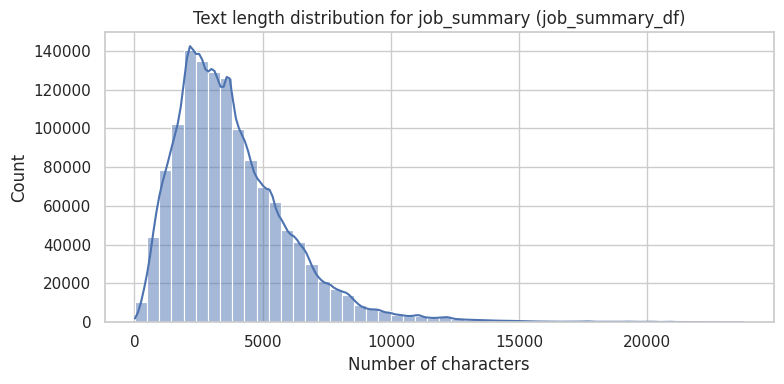

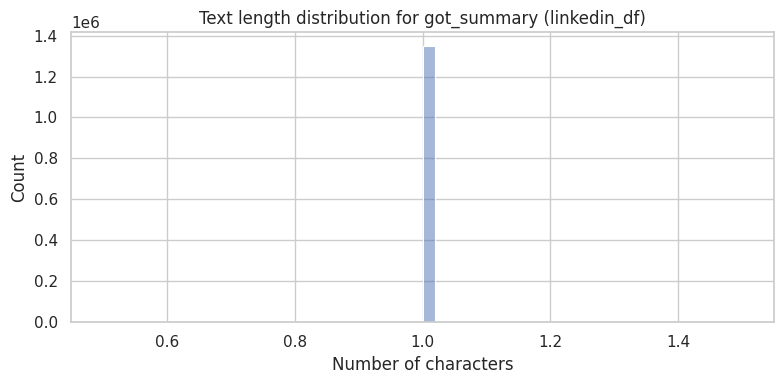

In [ ]:
# Text length distributions for description like columns

def plot_text_length(df, col, title_suffix="", bins=50):
    if col not in df.columns:
        return
    lengths = df[col].dropna().astype(str).str.len()
    plt.figure(figsize=(8,4))
    sns.histplot(lengths, bins=bins, kde=True)
    plt.title(f"Text length distribution for {col} {title_suffix}")
    plt.xlabel("Number of characters")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

for df, name in [
    (job_skills_df, "job_skills_df"),
    (job_summary_df, "job_summary_df"),
    (linkedin_df, "linkedin_df"),
]:
    for col in df.columns:
        if "desc" in col.lower() or "summary" in col.lower():
            plot_text_length(df, col, title_suffix=f"({name})")


In [ ]:
# Checking overlap / keys between files

# Looking for possible shared columns
common_cols = set(job_skills_df.columns) & set(job_summary_df.columns) & set(linkedin_df.columns)
print("Common columns across all three:", common_cols)

pair_common = {
    "skills & summary": set(job_skills_df.columns) & set(job_summary_df.columns),
    "skills & linkedin": set(job_skills_df.columns) & set(linkedin_df.columns),
    "summary & linkedin": set(job_summary_df.columns) & set(linkedin_df.columns),
}
print("\nPairwise common columns:", pair_common)


Common columns across all three: {'job_link'}

Pairwise common columns: {'skills & summary': {'job_link'}, 'skills & linkedin': {'job_link'}, 'summary & linkedin': {'job_link'}}


In [ ]:
# Merging summary + skills on job_link
summary_skills_df = pd.merge(
    job_summary_df,
    job_skills_df,
    on="job_link",
    how="inner"
)

print(summary_skills_df.shape)
summary_skills_df.head()


(1296381, 3)


,job_link,job_summary,job_skills
0,https://www.linkedin.com/jobs/view/restaurant-manager-at-rock-n-roll-sushi-3805551344,"Rock N Roll Sushi is hiring a Restaurant Manager!\nAs our Restaurant Manager, you’ll never be bored. You’ll be responsible for making sure our restaurant runs smoothly.\nWe Offer\nCompetitive comp...","Restaurant Management, Food and Beverage Knowledge, Leadership, Restaurant Software, Staff Coordination, Operational Excellence, Law Compliance, Customer Service, Communication, Problem Solving"
1,https://www.linkedin.com/jobs/view/med-surg-registered-nurse-rn-at-touchette-regional-hospital-3732389852,Schedule\n: PRN is required minimum 12 hours per period.\nJob Summary\nThe Registered Nurse (RN) is responsible for managing the individualized patient care by promoting and restoring patients' he...,"Registered Nurse, Patient Care, Nursing, Healthcare, BLS Certification, ACLS Certification, Patient Assessment, Plan of Care, Treatment, Nursing Interventions, Patient Education, Documentation, Co..."
2,https://www.linkedin.com/jobs/view/registered-nurse-cath-lab-at-stonesprings-hospital-center-3799543261,Description\nIntroduction\nAre you looking for a place to deliver excellent care patients deserve? At StoneSprings Hospital Center we support our colleagues in their positions. Join our Team as a(...,"Registered Nurse, Cath Lab, Intentional Radiology, Advanced Cardiac Life Support, Basic Cardiac Life Support, Discharge Planning, Patient Care, Health Care Providers, Patient Information, Medical ..."
3,https://uk.linkedin.com/jobs/view/commercial-account-executive-at-the-recruit-lab-3805254225,Commercial account executive\nSheffield\nFull time/ permanent\n£30k-40k + OTE (depending on experience).\nAn exciting opportunity has arisen for a driven and ambitious Commercial Account Executive...,"Business Development, Communication, Client Retention, Customer Service, Data Entry, Email, Insurance, Interpersonal Skills, Negotiation, Organizational Skills, Problem Solving, Sales, Telephone, ..."
4,https://www.linkedin.com/jobs/view/store-manager-at-stop-shop-3782135496,"Address:\nUSA-CT-Newington-44 Fenn Road\nStore Code:\nSS - Human Resources Brands (2765625)\nAt Stop & Shop, we are dedicated to creating and maintaining a culture where the diverse backgrounds an...","Customer service, Communication skills, Leadership skills, Planning and organizing skills, Selfstarter, Crossfunctional communication, Analytical and strategic planning skills, Detailoriented, Tim..."


In [ ]:
# Adding metadata from linkedin_df
full_df = pd.merge(
    summary_skills_df,
    linkedin_df,
    on="job_link",
    how="left",
    suffixes=("", "_meta")
)

print(full_df.shape)
full_df.head()


(1296381, 16)


,job_link,job_summary,job_skills,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/restaurant-manager-at-rock-n-roll-sushi-3805551344,"Rock N Roll Sushi is hiring a Restaurant Manager!\nAs our Restaurant Manager, you’ll never be bored. You’ll be responsible for making sure our restaurant runs smoothly.\nWe Offer\nCompetitive comp...","Restaurant Management, Food and Beverage Knowledge, Leadership, Restaurant Software, Staff Coordination, Operational Excellence, Law Compliance, Customer Service, Communication, Problem Solving",2024-01-19 09:45:09.215838+00,t,t,f,Restaurant Manager,Rock N Roll Sushi,"Macon, GA",2024-01-13,Macon,United States,Kitchen Supervisor,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/med-surg-registered-nurse-rn-at-touchette-regional-hospital-3732389852,Schedule\n: PRN is required minimum 12 hours per period.\nJob Summary\nThe Registered Nurse (RN) is responsible for managing the individualized patient care by promoting and restoring patients' he...,"Registered Nurse, Patient Care, Nursing, Healthcare, BLS Certification, ACLS Certification, Patient Assessment, Plan of Care, Treatment, Nursing Interventions, Patient Education, Documentation, Co...",2024-01-19 09:45:09.215838+00,t,t,f,Med-Surg Registered Nurse (RN),Touchette Regional Hospital,"Centreville, IL",2024-01-13,Ferguson,United States,Judge,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/registered-nurse-cath-lab-at-stonesprings-hospital-center-3799543261,Description\nIntroduction\nAre you looking for a place to deliver excellent care patients deserve? At StoneSprings Hospital Center we support our colleagues in their positions. Join our Team as a(...,"Registered Nurse, Cath Lab, Intentional Radiology, Advanced Cardiac Life Support, Basic Cardiac Life Support, Discharge Planning, Patient Care, Health Care Providers, Patient Information, Medical ...",2024-01-19 09:45:09.215838+00,t,t,f,Registered Nurse Cath Lab,StoneSprings Hospital Center,"Dulles, VA",2024-01-13,Manassas,United States,Laboratory Technician,Mid senior,Onsite
3,https://uk.linkedin.com/jobs/view/commercial-account-executive-at-the-recruit-lab-3805254225,Commercial account executive\nSheffield\nFull time/ permanent\n£30k-40k + OTE (depending on experience).\nAn exciting opportunity has arisen for a driven and ambitious Commercial Account Executive...,"Business Development, Communication, Client Retention, Customer Service, Data Entry, Email, Insurance, Interpersonal Skills, Negotiation, Organizational Skills, Problem Solving, Sales, Telephone, ...",2024-01-19 09:45:09.215838+00,t,t,f,Commercial Account Executive,The Recruit Lab,"South Yorkshire, England, United Kingdom",2024-01-13,Mansfield,United Kingdom,Handler,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/store-manager-at-stop-shop-3782135496,"Address:\nUSA-CT-Newington-44 Fenn Road\nStore Code:\nSS - Human Resources Brands (2765625)\nAt Stop & Shop, we are dedicated to creating and maintaining a culture where the diverse backgrounds an...","Customer service, Communication skills, Leadership skills, Planning and organizing skills, Selfstarter, Crossfunctional communication, Analytical and strategic planning skills, Detailoriented, Tim...",2024-01-19 09:45:09.215838+00,t,t,f,Store Manager,Stop & Shop,"Newington, CT",2024-01-13,New Britain,United States,Head Coach,Mid senior,Onsite


In [ ]:
# Basic checks on merged data
print(full_df[["job_summary", "job_skills"]].isna().sum())

print("\nSample rows (summary + skills):")
for i in range(3):
    row = full_df.sample(1, random_state=42 + i).iloc[0]
    print("="*80)
    print("JOB TITLE:", row.get("job_title", "NA"))
    print("COMPANY  :", row.get("company", "NA"))
    print("\nSUMMARY:\n", str(row["job_summary"])[:800])
    print("\nSKILLS:\n", row["job_skills"])


job_summary       0
job_skills     2085
dtype: int64

Sample rows (summary + skills):
JOB TITLE: Operating Engineer
COMPANY  : JLL

SUMMARY:
 What is your day to day?
Performance of ongoing preventive and repair response work orders on facility mechanical, electrical, and other installed systems, equipment, and other components.
Maintain, operate, and repair all HVAC systems and associated equipment, electrical distribution equipment, plumbing systems, building interior/exterior repair, and related grounds, and production equipment as it pertains to assigned buildings.
Working in and around raised floor environments and white space dedicated to Data Center and Labs.
Study and become familiar with the various items of equipment, and the methods required to use them properly, that are required in everyday activities. This to include building automation systems, fire / life safety systems, and any other building related equipment.


SKILLS:
 Facility Engineering, HVAC Systems, Electrical 

count    1.296381e+06
mean     2.076954e+01
std      1.165239e+01
min      0.000000e+00
25%      1.300000e+01
50%      1.900000e+01
75%      2.500000e+01
max      4.630000e+02
Name: n_skills, dtype: float64


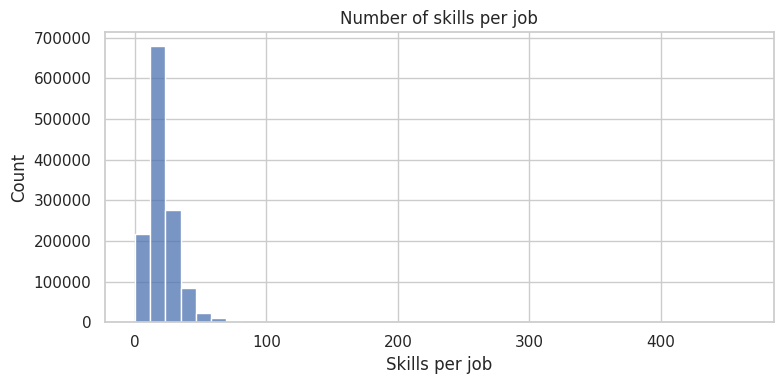

In [ ]:
# Number of skills per job
full_df["n_skills"] = full_df["job_skills"].fillna("").apply(
    lambda x: len([s for s in str(x).split(",") if s.strip()])
)

print(full_df["n_skills"].describe())

plt.figure(figsize=(8,4))
sns.histplot(full_df["n_skills"], bins=40)
plt.title("Number of skills per job")
plt.xlabel("Skills per job")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
# Most frequent raw skill strings (top 30)
from collections import Counter

skill_counter = Counter()
for s in full_df["job_skills"].dropna():
    for sk in s.split(","):
        sk = sk.strip()
        if sk:
            skill_counter[sk] += 1

most_common_skills = skill_counter.most_common(30)
most_common_skills


[('Communication', 368293),
 ('Teamwork', 226266),
 ('Leadership', 184341),
 ('Customer service', 166209),
 ('Communication skills', 116260),
 ('Customer Service', 110418),
 ('Problem Solving', 102046),
 ('Sales', 92766),
 ('Problemsolving', 92512),
 ('Nursing', 87484),
 ('Collaboration', 86804),
 ('Training', 83195),
 ('Project Management', 81106),
 ('Communication Skills', 78721),
 ('Attention to detail', 75476),
 ('Microsoft Office Suite', 73372),
 ('Time management', 72481),
 ('Time Management', 69769),
 ('Scheduling', 64090),
 ('Microsoft Office', 60277),
 ('Multitasking', 59234),
 ('Adaptability', 58707),
 ('Patient Care', 58373),
 ('Attention to Detail', 57676),
 ('Flexibility', 56556),
 ('Interpersonal skills', 55553),
 ('Documentation', 51511),
 ('Data Analysis', 47366),
 ('Organization', 46853),
 ('Problem solving', 46221)]

In [ ]:
import re

# 1) Drop rows with missing skills (keep only labeled examples)
labeled_df = full_df.dropna(subset=["job_skills"]).copy()

print("Original full_df shape:", full_df.shape)
print("After dropping missing job_skills:", labeled_df.shape)

# 2) Split the raw comma-separated string into a Python list
def split_skills(s):
    # s is something like: "Communication, Teamwork, Leadership"
    return [sk.strip() for sk in str(s).split(",") if sk.strip()]

labeled_df["skill_list"] = labeled_df["job_skills"].apply(split_skills)

# Quick check on list lengths
print("\nAverage skills per job:", labeled_df["skill_list"].str.len().mean())
print("Example skill_list rows:")
print(labeled_df["skill_list"].head(3))

# 3) Normalize each skill (lowercase, collapse spaces, strip)
def normalize_skill(s):
    s = s.strip()
    s = re.sub(r"\s+", " ", s)
    return s.lower()

labeled_df["skill_list_norm"] = labeled_df["skill_list"].apply(
    lambda skills: [normalize_skill(sk) for sk in skills]
)

# 4) Sanity check on normalized skills
print("\nExample normalized skill_list_norm rows:")
print(labeled_df["skill_list_norm"].head(3))

# 5) inspect most common normalized skills
from collections import Counter

norm_counter = Counter()
for skills in labeled_df["skill_list_norm"]:
    norm_counter.update(skills)

print("\nTop 30 normalized skills:")
for sk, cnt in norm_counter.most_common(30):
    print(f"{sk}: {cnt}")


Original full_df shape: (1296381, 17)
After dropping missing job_skills: (1294296, 17)

Average skills per job: 20.80300024105769
Example skill_list rows:
0        [Restaurant Management, Food and Beverage Knowledge, Leadership, Restaurant Software, Staff Coordination, Operational Excellence, Law Compliance, Customer Service, Communication, Problem Solving]
1    [Registered Nurse, Patient Care, Nursing, Healthcare, BLS Certification, ACLS Certification, Patient Assessment, Plan of Care, Treatment, Nursing Interventions, Patient Education, Documentation, C...
2    [Registered Nurse, Cath Lab, Intentional Radiology, Advanced Cardiac Life Support, Basic Cardiac Life Support, Discharge Planning, Patient Care, Health Care Providers, Patient Information, Medical...
Name: skill_list, dtype: object

Example normalized skill_list_norm rows:
0        [restaurant management, food and beverage knowledge, leadership, restaurant software, staff coordination, operational excellence, law compliance, c

In [ ]:
from collections import Counter

# Rebuild frequency counts
norm_counter = Counter()
for skills in labeled_df["skill_list_norm"]:
    norm_counter.update(skills)

# Very frequent generic soft skills to ignore entirely
manual_stop_skills = {
    "communication", "communication skills", "teamwork", "leadership",
    "problem solving", "time management", "attention to detail",
    "customer service", "adaptability", "flexibility", "collaboration",
    "interpersonal skills", "organizational skills", "multitasking",
}

# Also ignore any skill that is:
# - 1 word AND
# - extremely frequent (top N)
top_soft = {sk for sk, cnt in norm_counter.most_common(200)}

def is_good_skill(sk):
    tokens = sk.split()
    if sk in manual_stop_skills:
        return False
    if len(tokens) == 1 and sk in top_soft:
        return False
    # keep multi-word skills and rarer single-word skills
    return True

# Filter skill_list_norm to create a cleaner list
labeled_df["skill_list_clean"] = labeled_df["skill_list_norm"].apply(
    lambda skills: [sk for sk in skills if is_good_skill(sk)]
)

print("Average skills per job BEFORE:", labeled_df["skill_list_norm"].str.len().mean())
print("Average skills per job AFTER :", labeled_df["skill_list_clean"].str.len().mean())

print("\nExample cleaned skills:")
print(labeled_df["skill_list_clean"].head(3))


Average skills per job BEFORE: 20.80300024105769
Average skills per job AFTER : 17.407260008529732

Example cleaned skills:
0                                                                      [restaurant management, food and beverage knowledge, restaurant software, staff coordination, operational excellence, law compliance]
1    [registered nurse, patient care, bls certification, acls certification, patient assessment, plan of care, treatment, nursing interventions, patient education, critical thinking, cultural competenc...
2    [registered nurse, cath lab, intentional radiology, advanced cardiac life support, basic cardiac life support, discharge planning, patient care, health care providers, patient information, medical...
Name: skill_list_clean, dtype: object


In [ ]:
# find all occurrences of a skill phrase in the summary (case-insensitive)
def find_skill_spans(text, skill):
    spans = []
    if not text or not skill:
        return spans

    text_lower = text.lower()
    skill_lower = skill.lower()

    start = 0
    while True:
        idx = text_lower.find(skill_lower, start)
        if idx == -1:
            break
        end = idx + len(skill_lower)
        spans.append((idx, end))
        start = end
    return spans


# Build NER examples from cleaned skills
def build_ner_example_from_row(row, max_skills_per_job=50):
    text = str(row["job_summary"])
    skills = row["skill_list_clean"][:max_skills_per_job]

    entities = []
    for skill in skills:
        spans = find_skill_spans(text, skill)
        for start, end in spans:
            entities.append((start, end, "SKILL"))

    entities = sorted(set(entities), key=lambda x: (x[0], x[1]))
    return text, {"entities": entities}


# Use a larger subset for weak supervision
import random

subset_size = 15000
ner_rows = labeled_df.sample(n=subset_size, random_state=123).reset_index(drop=True)

ner_examples = []
for _, row in ner_rows.iterrows():
    text, ann = build_ner_example_from_row(row)
    if ann["entities"]:
        ner_examples.append((text, ann))

print(f"Created {len(ner_examples)} CLEAN NER examples from {subset_size} rows.")


Created 14674 CLEAN NER examples from 15000 rows.


In [ ]:
import spacy
from spacy.tokens import DocBin
from spacy.util import filter_spans

# Save all weak-labeled examples to a DocBin
nlp_blank = spacy.blank("en")
all_db = DocBin(attrs=["ENT_IOB", "ENT_TYPE"], store_user_data=True)

for text, ann in ner_examples:
    doc = nlp_blank.make_doc(text)
    spans = []
    for start, end, label in ann["entities"]:
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is not None:
            spans.append(span)
    spans = filter_spans(spans)
    doc.ents = spans
    if doc.ents:
        all_db.add(doc)

all_db.to_disk("skill_ner_weak_train_clean.spacy")
print("Saved combined DocBin: skill_ner_weak_train_clean.spacy")


Saved combined DocBin: skill_ner_weak_train_clean.spacy


In [ ]:
# Split combined DocBin into 8k train / 500 dev

nlp_blank = spacy.blank("en")
all_db = DocBin().from_disk("skill_ner_weak_train_clean.spacy")
docs = list(all_db.get_docs(nlp_blank.vocab))
print("Total cleaned docs:", len(docs))

random.seed(42)
random.shuffle(docs)

subset_size = 8500
docs_small = docs[:subset_size]

train_docs = docs_small[:8000]
dev_docs   = docs_small[8000:8500]

print("Train docs:", len(train_docs))
print("Dev docs  :", len(dev_docs))

train_db = DocBin(docs=train_docs)
dev_db   = DocBin(docs=dev_docs)

train_db.to_disk("skill_ner_train_8k_clean.spacy")
dev_db.to_disk("skill_ner_dev_500_clean.spacy")

print("Saved 8k/500 cleaned train/dev DocBins.")


Total cleaned docs: 14670
Train docs: 8000
Dev docs  : 500
Saved 8k/500 cleaned train/dev DocBins.


# tok2vec

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import textwrap, pathlib

proj_dir = pathlib.Path("/content/drive/MyDrive/NLP_Skill_Extractor/tok2vec_baseline")
proj_dir.mkdir(parents=True, exist_ok=True)

cfg_text = textwrap.dedent("""
[paths]
train = "skill_ner_train_8k_clean.spacy"
dev = "skill_ner_dev_500_clean.spacy"
vectors = null
init_tok2vec = null

[system]
gpu_allocator = "pytorch"
seed = 0

[nlp]
lang = "en"
pipeline = ["tok2vec","ner"]
batch_size = 128
disabled = []
before_creation = null
after_creation = null
after_pipeline_creation = null
tokenizer = {"@tokenizers":"spacy.Tokenizer.v1"}
vectors = {"@vectors":"spacy.Vectors.v1"}

[components]

[components.tok2vec]
factory = "tok2vec"

[components.tok2vec.model]
@architectures = "spacy.Tok2Vec.v2"

[components.tok2vec.model.embed]
@architectures = "spacy.MultiHashEmbedding.v2"
width = 96
rows = 5000
attrs = ["NORM","PREFIX","SUFFIX","SHAPE"]
include_static_vectors = false

[components.tok2vec.model.encode]
@architectures = "spacy.MaxoutWindowEncoder.v2"
width = 96
window_size = 1
maxout_pieces = 3
depth = 2

[components.ner]
factory = "ner"
incorrect_spans_key = null
moves = null
scorer = {"@scorers":"spacy.ner_scorer.v1"}
update_with_oracle_cut_size = 100

[components.ner.model]
@architectures = "spacy.TransitionBasedParser.v2"
state_type = "ner"
extra_state_tokens = false
hidden_width = 64
maxout_pieces = 2
use_upper = false
nO = null

[components.ner.model.tok2vec]
@architectures = "spacy.Tok2VecListener.v1"
upstream = "tok2vec"

[corpora]

[corpora.train]
@readers = "spacy.Corpus.v1"
path = ${paths.train}
max_length = 0
gold_preproc = false
limit = 0
augmenter = null

[corpora.dev]
@readers = "spacy.Corpus.v1"
path = ${paths.dev}
max_length = 0
gold_preproc = false
limit = 0
augmenter = null

[training]
accumulate_gradient = 1
dev_corpus = "corpora.dev"
train_corpus = "corpora.train"
seed = ${system.seed}
gpu_allocator = ${system.gpu_allocator}
dropout = 0.1
patience = 1600
max_epochs = 0
max_steps = 20000
eval_frequency = 200
frozen_components = []
annotating_components = []
before_to_disk = null
before_update = null

[training.batcher]
@batchers = "spacy.batch_by_padded.v1"
discard_oversize = true
size = 2000
buffer = 256
get_length = null

[training.logger]
@loggers = "spacy.ConsoleLogger.v1"
progress_bar = false

[training.optimizer]
@optimizers = "Adam.v1"
beta1 = 0.9
beta2 = 0.999
L2_is_weight_decay = true
L2 = 0.01
grad_clip = 1.0
use_averages = false
eps = 0.00000001

[training.optimizer.learn_rate]
@schedules = "warmup_linear.v1"
warmup_steps = 250
total_steps = 20000
initial_rate = 0.001

[training.score_weights]
ents_f = 1.0
ents_p = 0.0
ents_r = 0.0
ents_per_type = null

[initialize]
vectors = ${paths.vectors}
init_tok2vec = ${paths.init_tok2vec}
vocab_data = null
lookups = null
before_init = null
after_init = null

[initialize.components]

[initialize.tokenizer]
""")

(cfg_path := proj_dir / "tok2vec_config.cfg").write_text(cfg_text)
cfg_path


PosixPath('/content/drive/MyDrive/NLP_Skill_Extractor/tok2vec_baseline/tok2vec_config.cfg')

In [4]:
import os, shutil, pathlib

os.chdir("/content/drive/MyDrive/NLP_Skill_Extractor")
print("Here:", os.getcwd())
print("Files:", os.listdir())

proj_dir = pathlib.Path("/content/drive/MyDrive/NLP_Skill_Extractor/tok2vec_baseline")
proj_dir.mkdir(parents=True, exist_ok=True)

shutil.copy("skill_ner_weak_train_clean.spacy", f"{proj_dir}/skill_ner_weak_train_clean.spacy")
shutil.copy("skill_ner_train_8k_clean.spacy",   f"{proj_dir}/skill_ner_train_8k_clean.spacy")
shutil.copy("skill_ner_dev_500_clean.spacy",   f"{proj_dir}/skill_ner_dev_500_clean.spacy")


Here: /content/drive/MyDrive/NLP_Skill_Extractor
Files: ['job_skills.csv', 'job_summary.csv', 'linkedin_job_postings.csv', 'skill_ner_weak_train_clean.spacy', 'skill_ner_train_8k_clean.spacy', 'skill_ner_dev_500_clean.spacy', 'tf_skill_ner_model_8k_clean', 'tok2vec_baseline']


'/content/drive/MyDrive/NLP_Skill_Extractor/tok2vec_baseline/skill_ner_dev_500_clean.spacy'

In [12]:
%cd /content/drive/MyDrive/NLP_Skill_Extractor/tok2vec_baseline
!python -m spacy train tok2vec_config.cfg --output ./output_tok2vec --gpu-id 0


/content/drive/MyDrive/NLP_Skill_Extractor/tok2vec_baseline
ℹ Saving to output directory: output_tok2vec
ℹ Using GPU: 0

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.0
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0       1827.62   1706.49    1.18    0.62   11.90    0.01
  0     200      78167.23  61018.97   17.58   24.97   13.56    0.18
  0     400       2948.83  11346.47   13.53   40.81    8.11    0.14
  0     600       2306.21  10339.51   18.80   44.52   11.91    0.19
  0     800       2111.64  11072.04    9.41   53.00    5.16    0.09
  0    1000       2544.07  11213.50   15.18   48.51    9.00    0.15
  0    1200       1682.16  10131.32   12.59   51.51    7.17    0.13
  0    1400       1667.60   97

In [13]:
!python -m spacy evaluate \
  output_tok2vec/model-best \
  skill_ner_dev_500_clean.spacy

ℹ Using CPU
ℹ To switch to GPU 0, use the option: --gpu-id 0

================================== Results ==================================

TOK     100.00
NER P   43.55 
NER R   19.59 
NER F   27.03 
SPEED   39569 


=============================== NER (per type) ===============================

            P       R       F
SKILL   43.55   19.59   27.03



#Transformer

In [ ]:
!pip install -U "spacy[transformers]"


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

import shutil, os

base_root = "/content/drive/MyDrive"
proj_dir  = f"{base_root}/NLP_Skill_Extractor"

os.makedirs(proj_dir, exist_ok=True)

# Copy the important DocBins to Drive
shutil.copy("skill_ner_weak_train_clean.spacy", f"{proj_dir}/skill_ner_weak_train_clean.spacy")
shutil.copy("skill_ner_train_8k_clean.spacy",   f"{proj_dir}/skill_ner_train_8k_clean.spacy")
shutil.copy("skill_ner_dev_500_clean.spacy",    f"{proj_dir}/skill_ner_dev_500_clean.spacy")

print("Saved DocBins to:", proj_dir)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Saved DocBins to: /content/drive/MyDrive/NLP_Skill_Extractor


In [ ]:
!python -m spacy init config tf_transformer.cfg \
    --lang en \
    --pipeline transformer,ner \
    --optimize accuracy \
    -G \
    --force


ℹ Generated config template specific for your use case
- Language: en
- Pipeline: ner
- Optimize for: accuracy
- Hardware: GPU
- Transformer: roberta-base
✔ Auto-filled config with all values
✔ Saved config
tf_transformer.cfg
You can now add your data and train your pipeline:
python -m spacy train tf_transformer.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [ ]:
cfg_path = "tf_transformer.cfg"
text = open(cfg_path, "r", encoding="utf8").read()

text = text.replace('train = "./train.spacy"', 'train = "skill_ner_train_8k_clean.spacy"')
text = text.replace('dev = "./dev.spacy"', 'dev = "skill_ner_dev_500_clean.spacy"')
text = text.replace('vectors = "en_core_web_lg"', 'vectors = null')

open(cfg_path, "w", encoding="utf8").write(text)
print("Updated transformer config to use 8k/500 DocBins.")


Updated transformer config to use 8k/500 DocBins.


In [ ]:
cfg_path = "tf_transformer.cfg"
with open(cfg_path, "r", encoding="utf8") as f:
    cfg_text = f.read()

print(cfg_text.split("[paths]")[1].split("\n\n")[0])



train = null
dev = null
vectors = null
init_tok2vec = null


In [ ]:
cfg_text = cfg_text.replace('train = null', 'train = "skill_ner_train_8k_clean.spacy"')
cfg_text = cfg_text.replace('dev = null', 'dev = "skill_ner_dev_500_clean.spacy"')

cfg_text = cfg_text.replace('train = "./train.spacy"', 'train = "skill_ner_train_8k_clean.spacy"')
cfg_text = cfg_text.replace('dev = "./dev.spacy"', 'dev = "skill_ner_dev_500_clean.spacy"')

with open(cfg_path, "w", encoding="utf8") as f:
    f.write(cfg_text)

print("Fixed [paths] train/dev in tf_transformer.cfg")


Fixed [paths] train/dev in tf_transformer.cfg


In [ ]:
import os

print("train exists:", os.path.exists("skill_ner_train_8k_clean.spacy"))
print("dev exists  :", os.path.exists("skill_ner_dev_500_clean.spacy"))


train exists: True
dev exists  : True


In [ ]:

base_root = "/content/drive/MyDrive"
base_path = f"{base_root}/NLP_Skill_Extractor"

!python -m spacy train tf_transformer.cfg \
    --output "{base_path}/tf_skill_ner_model_8k_clean" \
    --gpu-id 0


✔ Created output directory:
/content/drive/MyDrive/NLP_Skill_Extractor/tf_skill_ner_model_8k_clean
ℹ Saving to output directory:
/content/drive/MyDrive/NLP_Skill_Extractor/tf_skill_ner_model_8k_clean
ℹ Using GPU: 0

=========================== Initializing pipeline ===========================
2025-12-11 07:42:15.196709: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765438935.218443   54300 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765438935.225017   54300 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765438935.241916   54300 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [ ]:
!python -m spacy evaluate \
  /content/drive/MyDrive/NLP_Skill_Extractor/tf_skill_ner_model_8k_clean/model-best \
  /content/drive/MyDrive/NLP_Skill_Extractor/skill_ner_dev_500_clean.spacy


ℹ Using CPU
ℹ To switch to GPU 0, use the option: --gpu-id 0
2025-12-11 15:34:58.111662: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765467298.132994   15103 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765467298.139419   15103 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765467298.156226   15103 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765467298.156252   15103 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765467298.156

In [ ]:
import spacy

base_root = "/content/drive/MyDrive"
base_path = f"{base_root}/NLP_Skill_Extractor"
model_path = f"{base_path}/tf_skill_ner_model_8k_clean/model-last"

nlp_tf = spacy.load(model_path)

text = labeled_df["job_summary"].iloc[0]
doc = nlp_tf(text)

[(ent.text, ent.label_) for ent in doc.ents if ent.label_ == "SKILL"]


[('food and beverage knowledge', 'SKILL'),
 ('restaurant management software', 'SKILL')]

In [ ]:
import pandas as pd

# How many random examples to inspect
n_examples = 5

# Sample rows reproducibly
sampled = labeled_df.sample(n=n_examples, random_state=42).reset_index(drop=True)

for i, row in sampled.iterrows():
    text = str(row["job_summary"])
    title = str(row.get("job_title", ""))

    doc = nlp_tf(text)
    skills = [(ent.text, ent.start_char, ent.end_char)
              for ent in doc.ents if ent.label_ == "SKILL"]

    print("=" * 80)
    print(f"Example {i+1}")
    if title:
        print("JOB TITLE:", title)
    print("SUMMARY SNIPPET:", text[:300].replace("\n", " ") + ("..." if len(text) > 300 else ""))
    print("PREDICTED SKILLS:")
    if skills:
        for s, start, end in skills:
            print(f"  - {s}  (chars {start}-{end})")
    else:
        print("  - [no SKILL entities found]")


Example 1
JOB TITLE: Registered Nurse RN - Behavioral Health - Eating Disorders at Ascension Health
SUMMARY SNIPPET: Details** **Sign-on bonus:** Up to $25,000.00 **Department:** Eating Disorders **Schedule:** Multiple Schedules available to meet your needs **Hospital:** Ascension Alexian Brothers Behavioral Health Hospital **Location:** Hoffman Estates, IL**Benefits**Paid time off (PTO)Various health insurance op...
PREDICTED SKILLS:
  - patient care  (chars 883-895)
  - behavioral health  (chars 899-916)
  - group therapy  (chars 1457-1470)
  - BLS Provider  (chars 1769-1781)
  - American Heart Association  (chars 1860-1886)
  - American Red Cross  (chars 1890-1908)
  - Registered Nurse  (chars 1919-1935)
Example 2
JOB TITLE: Senior Project Manager - Aviation
SUMMARY SNIPPET: Work Location: Nashville, TN *** Salary: Based on experience and will be discussed with manager in interview Accura Engineering is looking for a Senior Project Manager to join our Aviation program in Nashville, 

#Demo


In [ ]:
!pip install -U "spacy[transformers]"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 795.8/795.8 kB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 104.6 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.1
    Uninstalling tokenizers-0.22.1:
      Successfully uninstalled tokenizers-0.22.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.3
    Uninstalling transformers-4.57.3:
      Successfully uninstalled transformers-4.57.3


In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
MODEL_PATH = "/content/drive/MyDrive/NLP_Skill_Extractor/tf_skill_ner_model_8k_clean/model-best"
nlp = spacy.load(MODEL_PATH)
print("Pipelines:", nlp.pipe_names)  # should now show ['transformer', 'ner']


Pipelines: ['transformer', 'ner']


In [ ]:
!pip install gradio -q


In [ ]:
import gradio as gr

def extract_skills(text: str) -> str:
    doc = nlp(text)
    skills = [ent.text for ent in doc.ents if ent.label_ == "SKILL"]
    return "\n".join(skills) if skills else "No SKILL entities found."

demo = gr.Interface(
    fn=extract_skills,
    inputs=gr.Textbox(
        lines=15,
        label="Job description",
        placeholder="Paste a job description here..."
    ),
    outputs=gr.Textbox(
        lines=15,
        label="Detected skills"
    ),
    title="Job Skill Extractor (spaCy Transformer)",
    description="Paste a job description and extract SKILL entities.",
    flagging_mode="never"
)

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://61431fcb9cf4461c7c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
